# Mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with epochs=5 and batch_size=64...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9795, Training Time: 76.84 sec
Training with epochs=5 and batch_size=128...
Test Accuracy: 0.9801, Training Time: 41.91 sec
Training with epochs=10 and batch_size=64...
Test Accuracy: 0.9828, Training Time: 205.80 sec
Training with epochs=10 and batch_size=128...
Test Accuracy: 0.9806, Training Time: 91.46 sec

Results (Epochs, Batch Size, Test Accuracy, Training Time):
[[  5.          64.           0.9795      76.83916879]
 [  5.         128.           0.98009998  41.91131377]
 [ 10.          64.           0.98280001 205.79803634]
 [ 10.         128.           0.9806      91.46184802]]


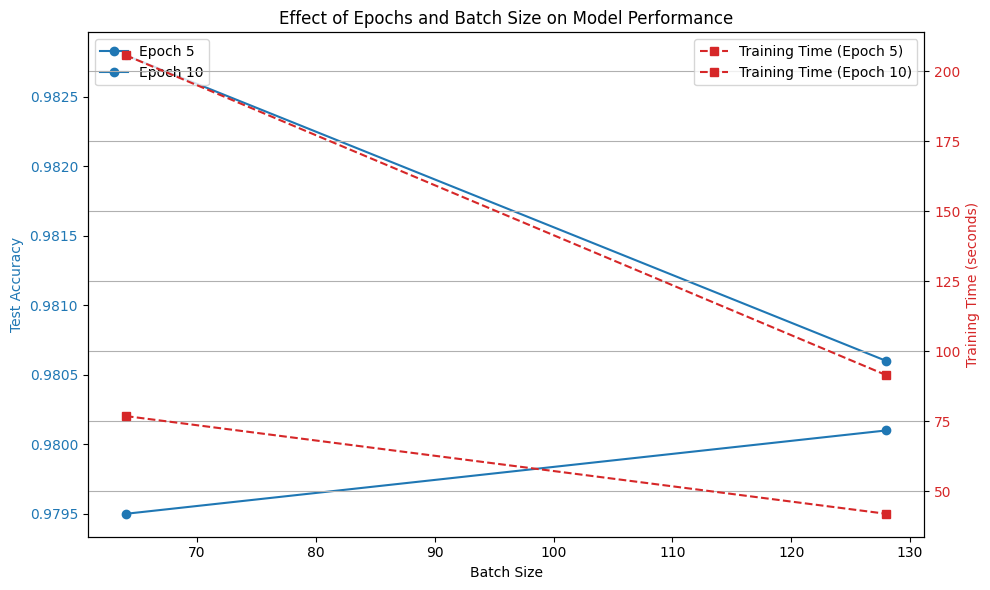

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

# 載入 MNIST 資料集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 定義網路架構
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 設定不同的 epoch 和 batch_size
epochs_list = [5, 10]
batch_sizes_list = [64, 128]

results = []

# 執行實驗
for epochs in epochs_list:
    for batch_size in batch_sizes_list:
        print(f"Training with epochs={epochs} and batch_size={batch_size}...")

        # 建立模型
        model = create_model()

        # 記錄訓練時間
        start_time = time.time()
        history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0)
        end_time = time.time()

        # 計算測試準確度
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

        # 計算訓練時間（秒）
        training_time = end_time - start_time

        # 存入結果
        results.append((epochs, batch_size, test_acc, training_time))

        print(f"Test Accuracy: {test_acc:.4f}, Training Time: {training_time:.2f} sec")

# 轉換為 NumPy 陣列
results = np.array(results)

# 顯示表格
print("\nResults (Epochs, Batch Size, Test Accuracy, Training Time):")
print(results)

# 畫圖顯示結果
fig, ax1 = plt.subplots(figsize=(10, 6))

# 繪製測試準確度曲線
ax1.set_xlabel('Batch Size')
ax1.set_ylabel('Test Accuracy', color='tab:blue')
for epochs in epochs_list:
    epoch_results = results[results[:, 0] == epochs]
    ax1.plot(epoch_results[:, 1], epoch_results[:, 2], label=f'Epoch {epochs}', marker='o', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 創建第二個 y 軸顯示訓練時間
ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (seconds)', color='tab:red')
for epochs in epochs_list:
    epoch_results = results[results[:, 0] == epochs]
    ax2.plot(epoch_results[:, 1], epoch_results[:, 3], label=f'Training Time (Epoch {epochs})', marker='s', linestyle='dashed', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 標題與圖例
plt.title('Effect of Epochs and Batch Size on Model Performance')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()


# Boston Housing Price

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from keras import models, layers
from sklearn.metrics import mean_absolute_error, mean_squared_error

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [7]:
def build_model(hidden_layers=2, units=64, activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(units, activation=activation, input_shape=(train_data.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(units, activation=activation))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [8]:
def evaluate_model(hidden_layers, units, activation, batch_size, epochs):
    model = build_model(hidden_layers, units, activation)
    history = model.fit(train_data, train_targets, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)
    test_mse_score, test_mae_score = model.evaluate(test_data, test_targets, verbose=0)
    predictions = model.predict(test_data)
    rmse = np.sqrt(mean_squared_error(test_targets, predictions))
    mape = np.mean(np.abs((test_targets - predictions.flatten()) / test_targets)) * 100
    return test_mae_score, rmse, mape, history

In [9]:
configurations = [
    #不同節點
    {'hidden_layers': 2, 'units': 32, 'activation': 'relu', 'batch_size': 16, 'epochs': 100},
    {'hidden_layers': 2, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100},
    {'hidden_layers': 2, 'units': 128, 'activation': 'relu', 'batch_size': 16, 'epochs': 100},
    #不同隱藏層
    {'hidden_layers': 1, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100},
    {'hidden_layers': 2, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100},
    {'hidden_layers': 3, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100},
    #同條件不同激活函數
    {'hidden_layers': 2, 'units': 64, 'activation': 'sigmoid', 'batch_size': 16, 'epochs': 100},
    {'hidden_layers': 2, 'units': 64, 'activation': 'softplus', 'batch_size': 16, 'epochs': 100},
    {'hidden_layers': 2, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100},
]

In [10]:
results = []
for config in configurations:
    mae, rmse, mape, history = evaluate_model(**config)
    results.append((config, mae, rmse, mape))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


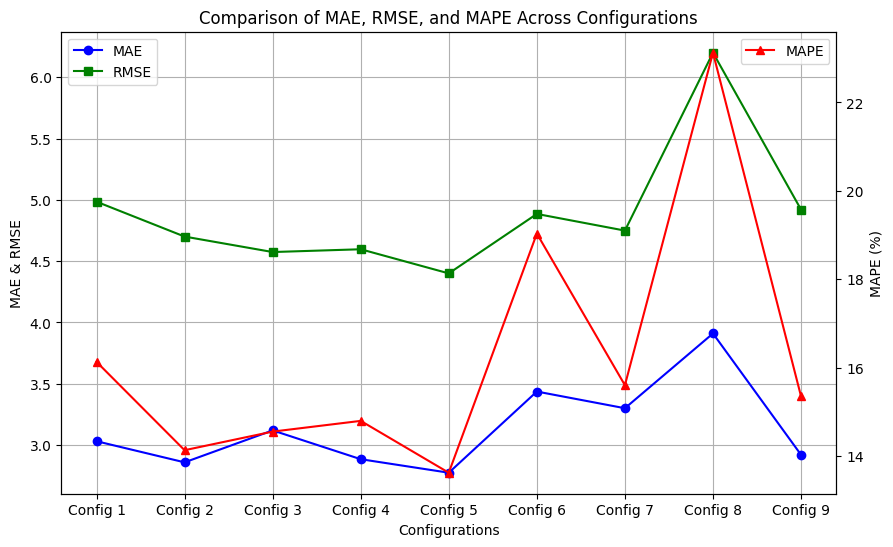

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
configs = [f"Config {i+1}" for i in range(len(results))]

mae_values = [result[1] for result in results]
rmse_values = [result[2] for result in results]
mape_values = [result[3] for result in results]

ax1.plot(configs, mae_values, marker='o', label='MAE', color='blue')
ax1.plot(configs, rmse_values, marker='s', label='RMSE', color='green')
ax2.plot(configs, mape_values, marker='^', label='MAPE', color='red')

ax1.set_xlabel("Configurations")
ax1.set_ylabel("MAE & RMSE")
ax2.set_ylabel("MAPE (%)")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True)
plt.xticks(rotation=45)
plt.title("Comparison of MAE, RMSE, and MAPE Across Configurations")

plt.show()


In [12]:
import pandas as pd

df = pd.DataFrame(results, columns=['Config', 'MAE', 'RMSE', 'MAPE'])
df['Config'] = df['Config'].astype(str)

df['MAE'] = df['MAE'].map('{:,.3f}'.format)
df['RMSE'] = df['RMSE'].map('{:,.3f}'.format)
df['MAPE'] = df['MAPE'].map('{:,.2f}%'.format)

pd.set_option('display.max_colwidth', 30)
pd.set_option('display.unicode.east_asian_width', True)

print(df.to_markdown(index=False, tablefmt="github", stralign="left", numalign="decimal"))

| Config                                                                                       |   MAE |   RMSE | MAPE   |
|----------------------------------------------------------------------------------------------|-------|--------|--------|
| {'hidden_layers': 2, 'units': 32, 'activation': 'relu', 'batch_size': 16, 'epochs': 100}     | 3.031 |  4.985 | 16.13% |
| {'hidden_layers': 2, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100}     | 2.859 |  4.701 | 14.14% |
| {'hidden_layers': 2, 'units': 128, 'activation': 'relu', 'batch_size': 16, 'epochs': 100}    | 3.119 |  4.574 | 14.56% |
| {'hidden_layers': 1, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100}     | 2.884 |  4.597 | 14.80% |
| {'hidden_layers': 2, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100}     | 2.774 |  4.4   | 13.63% |
| {'hidden_layers': 3, 'units': 64, 'activation': 'relu', 'batch_size': 16, 'epochs': 100}     | 3.436 |  4.885 | 19.04% |
| {'hidden_layer

In [ ]:
predictions = model.predict(test_data)
print(predictions[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[10.057587]


# Q1 隱藏層數量及節點數量對預測績效的影響

從結果來看，隱藏層的數量與神經元的數量確實影響了模型的預測績效

### 隱藏層

兩層隱藏層的模型通常具有較好的 RMSE，比單層的模型略優，但在某些情況下，多層模型可能反而降低了效能。

這可能是因為過深的模型會導致過擬合，導致測試集的誤差增加。

---

### 神經元

units=64 似乎是較好的選擇，因為 units=128 時（{'hidden_layers': 2, 'units': 128}），RMSE 反而上升（4.574）。
units=32 時，MAE 為 3.031，較 units=64（2.859）略差，顯示適度增加神經元數有助於提升表現。

# Q2 激活函數（Activation Function）對預測績效的影響

從實驗結果來看，ReLU 仍然是最優選的激活函數，而 Sigmoid 和 Softplus 效果較差。

1. ReLU 表現最佳

{'hidden_layers': 2, 'units': 64, 'activation': 'relu'} 有最低的 RMSE（4.4）和最低的 MAPE（13.63%）。
這符合 ReLU 在深度學習中的常見表現，因為它能有效避免梯度消失問題，並加速收斂。

---

2. Sigmoid 表現較差

{'hidden_layers': 2, 'units': 64, 'activation': 'sigmoid'} 的 RMSE 為 4.749，比 ReLU 高，MAPE 也較高（15.61%）。
Sigmoid 容易造成梯度消失，導致較差的效能。

---

3. Softplus 表現最差

{'hidden_layers': 2, 'units': 64, 'activation': 'softplus'} RMSE 高達 6.2，MAPE 也高達 23.12%。
Softplus 的曲線較平滑，可能導致訓練時學習過慢，影響最終結果。

# Q3 Batch Size 和 Epoch 對訓練時間及預測績效的影響

從結果來看，batch size 和 epoch 不僅影響準確率，也顯著影響訓練時間。

1. Epoch 對準確率影響

Epoch 增加，準確率略微提升：

* 當 epoch=5 時，準確率約為 0.9795 ~ 0.9801。

* 當 epoch=10 時，準確率提升至 0.9806 ~ 0.9828。

---

2. Batch Size 對準確率影響

Batch size 較小 (64) 時，準確率較高：

* epoch=10, batch_size=64 準確率最高 (0.9828)，顯示較小的 batch size 能夠提升模型的泛化能力。

* batch_size=128 時，準確率在兩個 epoch 設定下皆略低（0.9801 和 0.9806）。

---

3. Batch Size 和 Epoch 對訓練時間影響

Batch size 增加，訓練時間大幅縮短：

* epoch=5, batch_size=64：76.84 秒
* epoch=5, batch_size=128：41.91 秒（約縮短 45%）
* epoch=10, batch_size=64：205.80 秒
* epoch=10, batch_size=128：91.46 秒（約縮短 55%）

Batch size=128 的訓練速度明顯快於 batch size=64，這是因為較大的 batch size 減少了梯度更新次數，使訓練更有效率。